# Running Total or Cummulative by Date

> Note that for cumulative value to appear in a table or graph, the date value has to come from a date variable. Secondary year-month calculations will not work 

    sales_cummulative = 
        CALCULATE(
            [Sales_measure],
            FILTER(ALL(Sales[DueDateKey]),Sales[DueDateKey]<=MAX(Sales[DueDateKey])))

# Running Total or Cummulative by a Categorical Variable using RANKX and TOPN

    Cumulative_sales_rankx = 

    VAR ranked = RANKX(
                    ALL(DimProductCategory[ProductCategoryName]),
                    [Sales_Amount]
                    )

    RETURN 
        IF(ISINSCOPE(DimProductCategory[ProductCategoryName]),
            CALCULATE(
                [Sales_Amount],
                TOPN(
                    ranked,
                    ALL(DimProductCategory),
                    [Sales_Amount])
                    )
        )

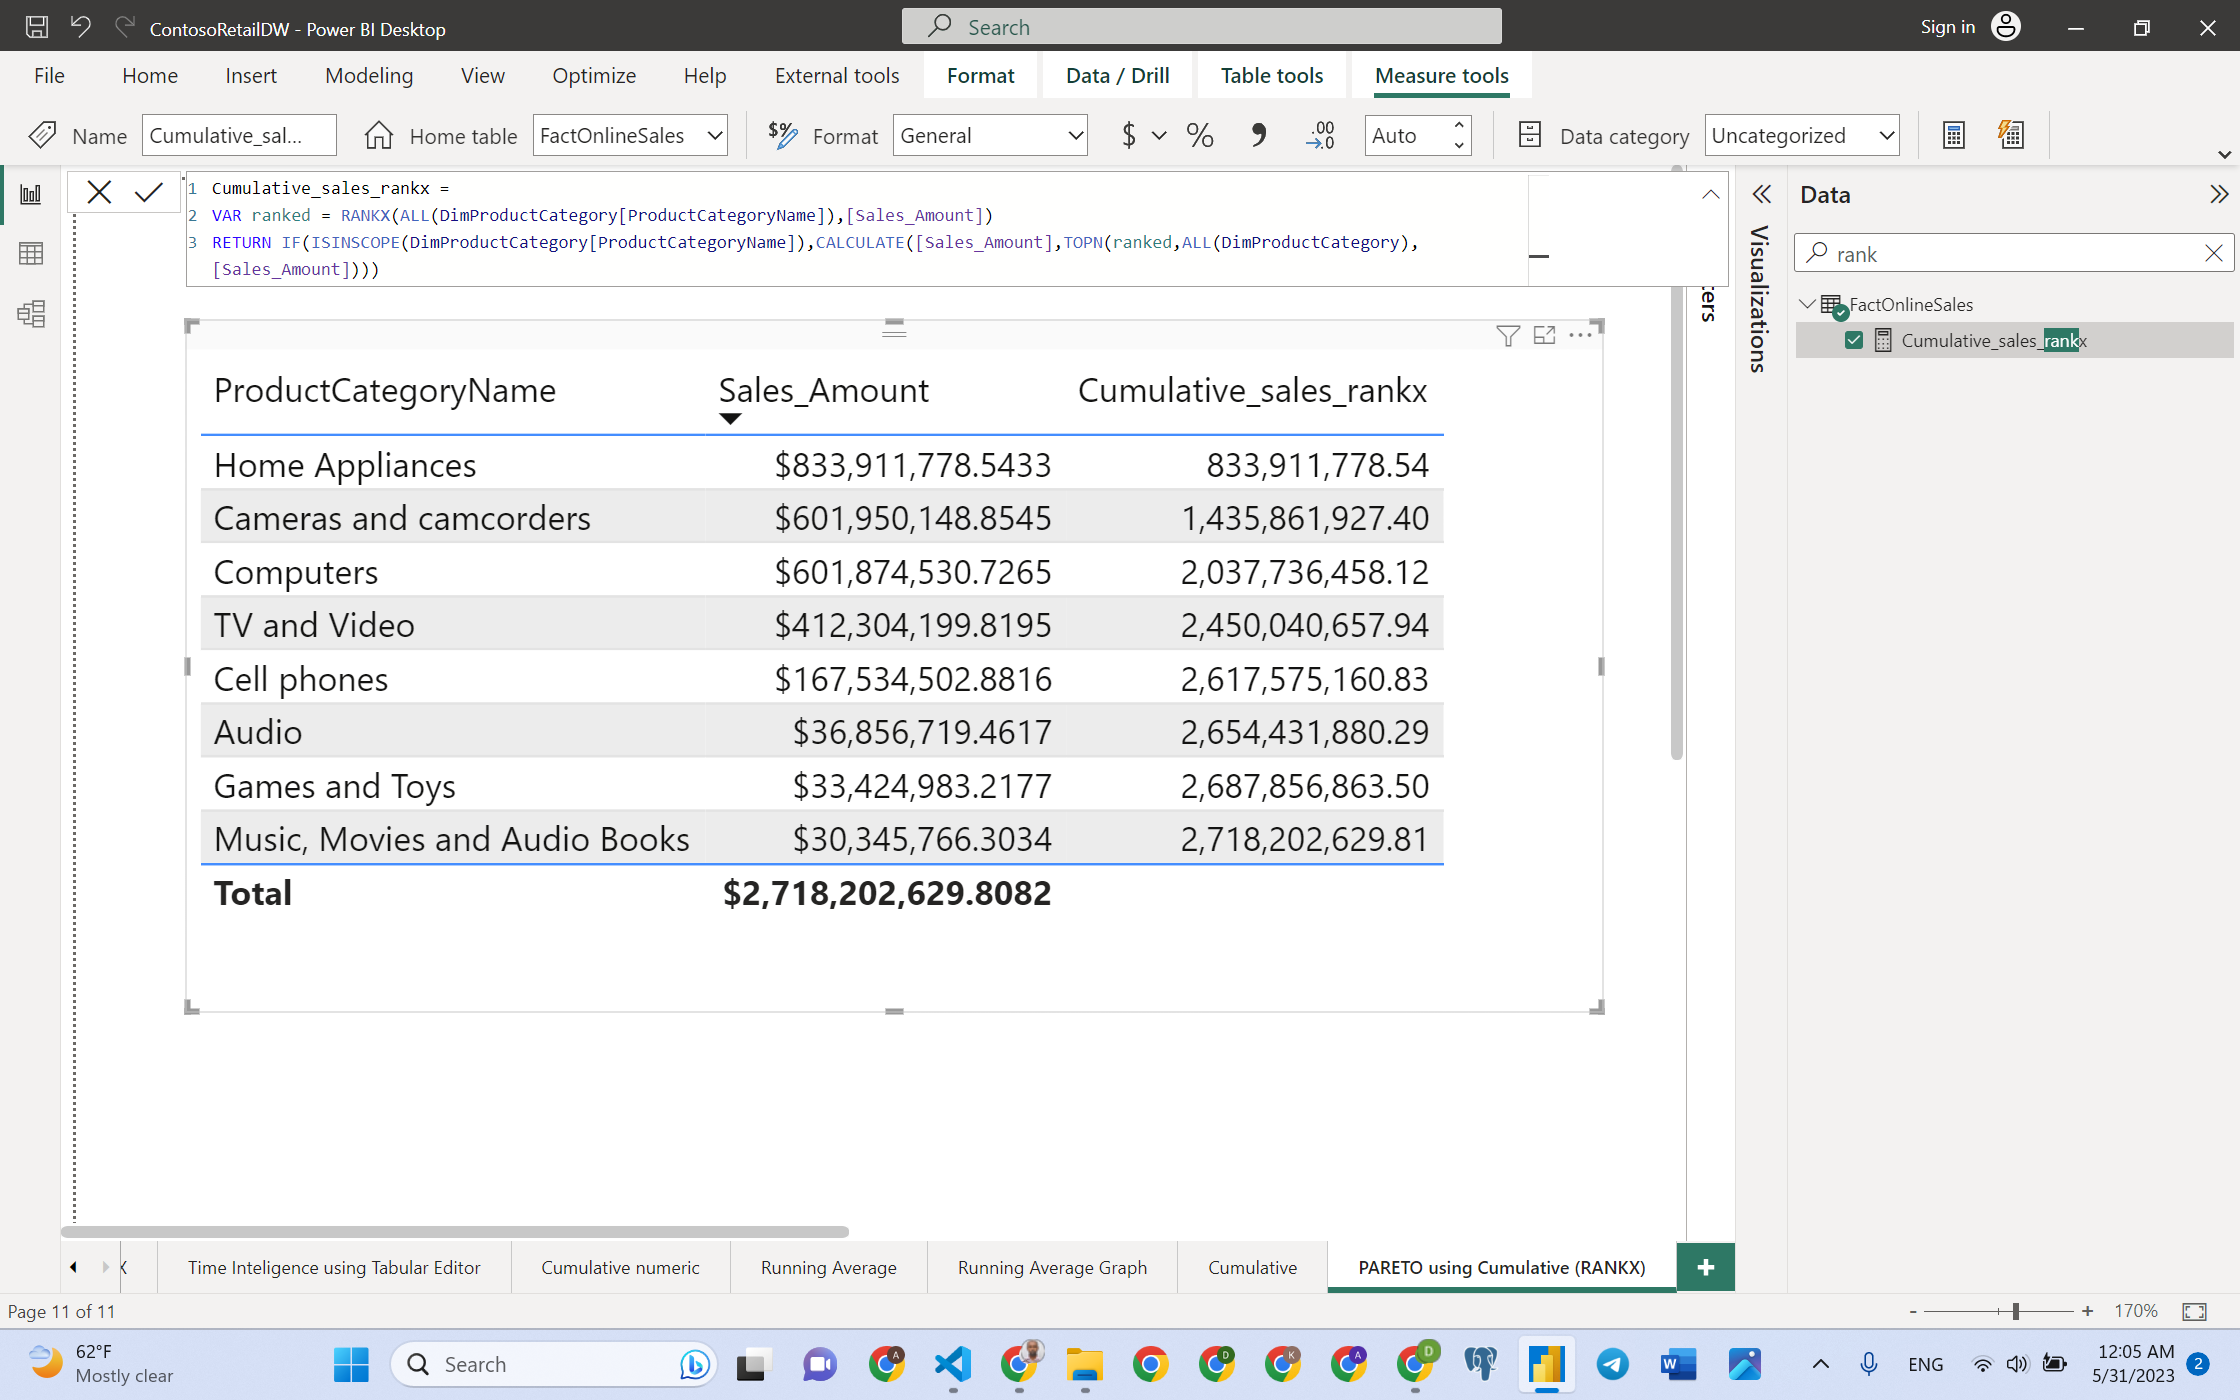

# Running Total without showing total: using SELECTEDVALUE

> Note that the output table should have the same value as the column used in the filter (DueDateKey in this case) for the result to be correct. If YearMonth is needed in the output, then that should be used


    cumulative_sales_using_calculated = 

    CALCULATE([Sales_measure],Sales[DueDateKey]<=SELECTEDVALUE(Sales[DueDateKey]))

# Running Total without showing rank for total using ISINSCOPE
    rank_sales_country = 


    IF(ISINSCOPE(Reseller[Country-Region]),


    RANKX(ALL(Reseller[Country-Region]),[Sales_measure])
    )